# Exploração e Análise dos Dados

- Visualização e Instalação
    - Análise de Visualizações
    - Análise de Instalações
- Terminais que interagiram com os aplicativos
    - Análise dos dados
    - Gráfico de distribuição
    - Gráfico de dispersão
- Popularidade dos aplicativos
    - Análise dos dados
    - Gráfico de distribuição
    - Gráfico de dispersão

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

import operator
from scipy import stats
import matplotlib.cm as cm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

## Dados de Visualização e Instalação

### Análise de Visualizações

In [75]:
df_views = pd.read_csv('data/views.csv')

terminals = df_views['Terminal'].unique()
applications = df_views['ApplicationId'].unique()
views = df_views['Terminal']

nb_terminals = len(terminals)
nb_applications = len(applications)
nb_views = len(views)

sparsity = 1 - nb_views/float(nb_terminals * nb_applications)

print('Visão Geral:')
print('Número de terminais:', nb_terminals)
print('Número de aplicativos:', nb_applications)
print('Número de visualizações:', nb_views)
print('Esparsidade:', sparsity)

Visão Geral:
Número de terminais: 2192
Número de aplicativos: 163
Número de visualizações: 59778
Esparsidade: 0.8326933410953383


### Análise de Instalações

In [76]:
df_installations = pd.read_csv('data/installations.csv')

terminals = df_installations['Terminal'].unique()
applications = df_installations['ApplicationId'].unique()
installations = df_installations['Terminal']

nb_terminals = len(terminals)
nb_applications = len(applications)
nb_installations = len(installations)

sparsity = 1 - nb_installations/float(nb_terminals * nb_applications)

print('Visão Geral:')
print('- Número de terminais:', nb_terminals)
print('- Número de aplicativos:', nb_applications)
print('- Número de instalações:', nb_installations)
print('- Esparsidade:', sparsity)

Visão Geral:
- Número de terminais: 824
- Número de aplicativos: 163
- Número de instalações: 17716
- Esparsidade: 0.8680981595092024


## Terminais que interagiram com os aplicativos

### Análise dos dados

In [77]:
df = pd.read_csv('data/applications-by-terminals.csv')

apps_interacted_by_terminal = df.groupby('Terminal')['ApplicationId'].apply(list)

terminals_historic = {}
for terminal in terminals:
    terminals_historic[terminal] = len(apps_interacted_by_terminal[terminal][:])

distribution = list(terminals_historic.values())
distribution.sort()

print('Informações específicas:')
print('- Média: ', np.mean(distribution))
print('- Mediana: ', np.median(distribution))
print('- Mínimo: ', np.min(distribution))
print('- Máximo: ', np.max(distribution))
print('- Desvio padrão: ', np.std(distribution))

Informações específicas:
- Média:  29.464805825242717
- Mediana:  28.0
- Mínimo:  1
- Máximo:  95
- Desvio padrão:  17.492265259089088


### Gráfico de distribuição

Text(0.5, 1.0, 'Terminais que interagiram com aplicativos')

Text(0, 0.5, 'Quantidade de Aplicativos')

Text(0.5, 0, 'Terminais')

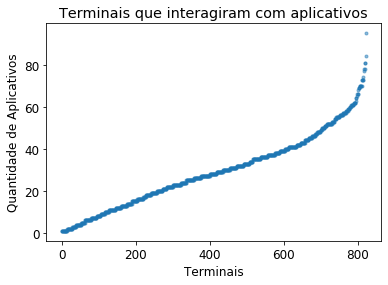

In [78]:
plt.plot(distribution, '.', alpha=0.5)
plt.title('Terminais que interagiram com aplicativos')
plt.ylabel('Quantidade de Aplicativos')
plt.xlabel('Terminais')
plt.show()

### Gráfico de dispersão

Text(0.5, 1.0, 'Terminais que interagiram com aplicativos')

Text(0, 0.5, 'Interações')

Text(0.5, 0, 'Terminais')

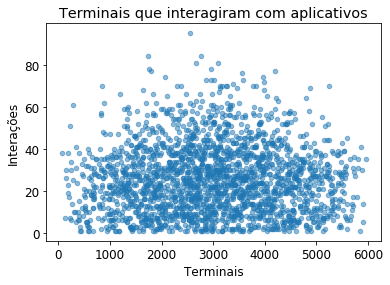

In [79]:
df_interactions_by_applications = df.groupby('Terminal')['ApplicationId'].count().reset_index(name='count') \
    .sort_values(['count'], ascending=False)

df_interactions_by_applications.plot.scatter(x='Terminal', y='count', alpha=0.5)
plt.title('Terminais que interagiram com aplicativos')
plt.ylabel('Interações')
plt.xlabel('Terminais')
plt.show()  

## Popularidade dos aplicativos

### Análise dos dados

In [80]:
df = pd.read_csv('data/applications-by-terminals.csv')

terminals_who_interacted_with_an_application = df.groupby('ApplicationId')['Terminal'].apply(list)

apps_popularity = {}
for app in applications:
    apps_popularity[app] = len(terminals_who_interacted_with_an_application[app][:])

distribution = list(apps_popularity.values())
distribution.sort()

print('Informações específicas:')
print('- Média: ', np.mean(distribution))
print('- Mediana: ', np.median(distribution))
print('- Mínimo: ', np.min(distribution))
print('- Máximo: ', np.max(distribution))
print('- Desvio padrão: ', np.std(distribution))

Informações específicas:
- Média:  347.3312883435583
- Mediana:  325.0
- Mínimo:  290
- Máximo:  809
- Desvio padrão:  79.56669889587475


#### Gráfico de distribuição 

Text(0.5, 1.0, 'Popularidade dos aplicativos')

Text(0, 0.5, 'Popularidade')

Text(0.5, 0, 'Aplicativos')

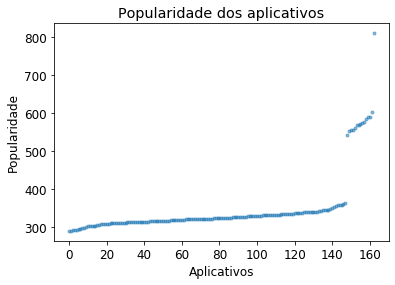

In [81]:
plt.plot(distribution, '.', alpha=0.5)
plt.title('Popularidade dos aplicativos')
plt.ylabel('Popularidade')
plt.xlabel('Aplicativos')
plt.show()

#### Gráfico de distribuição 

Text(0.5, 1.0, 'Popularidade dos aplicativos')

Text(0, 0.5, 'Interações')

Text(0.5, 0, 'Aplicativos')

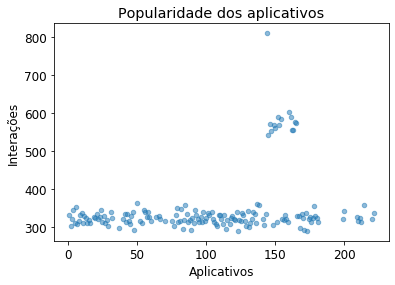

In [82]:
df_interactions_by_applications = df.groupby('ApplicationId')['Terminal'].count().reset_index(name='count') \
    .sort_values(['count'], ascending=False)

df_interactions_by_applications.plot.scatter(x='ApplicationId', y='count', alpha=0.5)
plt.title('Popularidade dos aplicativos')
plt.ylabel('Interações')
plt.xlabel('Aplicativos')
plt.show()